# Parameterization with the Open Force Field Toolkit
This notebook shows how to use the API of `offpele` to combine the parameters from OPLS2005 and force fields from the Open Force Field initiative. There are several possible combinations that are displayed below.

## Example 1: Open Force Field parameters with OPLS2005 charges
This example shows how to parameterize a molecule by combining the parameters from the Open Force Field initiative with OPLS2005 partial charges.

### Load the required classes from `offpele`'s API

In [1]:
from offpele.topology import Molecule
from offpele.template import Impact

### `offpele` requires the Schrodinger Toolkit to use the OPLS2005 parameters
To indicate the path to the Schrodinger's installation `offpele` needs the following environment variable to be set.

In [2]:
import os
os.environ['SCHRODINGER'] = '/opt/schrodinger/suites2020-2/'

### Load `offpele`'s molecule representation with a PDB file of anthracene

 - Constructing molecule from a SMILES tag with RDKit


 - Generating rotamer library


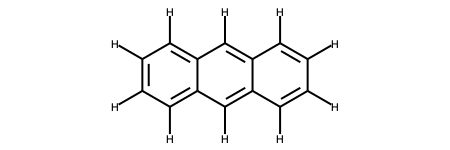

In [3]:
molecule = Molecule(smiles='c1ccc2cc3ccccc3cc2c1')
display(molecule)

### Parameterize with `Open Force Field Toolkit` and `ffld_server`, and generate the Impact template
Please, note that to use OPLS2005 partial charges from OPLS2005 we need to select the `OPLS` option in the `charges_method` parameter when calling the `Molecule.parameterize()` function.
Then, the Impact template, named __antz__, can be generated.

In [4]:
molecule.parameterize('openff_unconstrained-1.2.0.offxml',
                      charges_method='OPLS')
impact = Impact(molecule)
impact.write('antz')

 - Loading forcefield
 - Computing partial charges with OPLS


## Example 2: Open Force Field parameters with OPLS2005 non-bonding parameters
This example shows how to parameterize a molecule by combining the parameters from the Open Force Field initiative with OPLS2005 non-bonding terms. This combination of parameters allows PELE to use its SGB implicit solvent model (which requires OPLS2005 atom types to be assigned).

### Load the required classes from `offpele`'s API

In [5]:
from offpele.topology import Molecule
from offpele.template import Impact

### `offpele` requires the Schrodinger Toolkit to use the OPLS2005 parameters
To indicate the path to the Schrodinger's installation `offpele` needs the following environment variable to be set.

In [6]:
import os
os.environ['SCHRODINGER'] = '/opt/schrodinger/suites2020-2/'

### Load `offpele`'s molecule representation with a PDB file of aldicarb

 - Constructing molecule from a SMILES tag with RDKit
 - Generating rotamer library


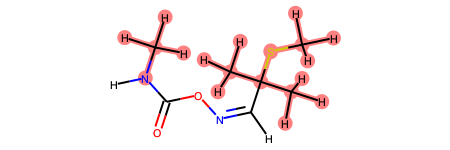

In [7]:
molecule = Molecule(smiles='CC(C)(/C=N\OC(=O)NC)SC')
display(molecule)

### Parameterize with `Open Force Field Toolkit` and `ffld_server`, and generate the Impact template
To work with OPLS2005 non-bonding parameters, we need to call `Molecule.parameterize()` with an extra parameter, `use_OPLS_nonbonding_params`, set to `True`. Then, the Impact template, named __aldz__, can be generated.

In [8]:
molecule.parameterize('openff_unconstrained-1.2.0.offxml',
                      use_OPLS_nonbonding_params=True)
impact = Impact(molecule)
impact.write('antz')

 - Loading forcefield
 - Computing partial charges with am1bcc


## Example 3: OPLS2005 non-bonding parameters and bond and angle terms with Open Force Field torsions
This example shows how to parameterize a molecule by combining the parameters from the OPLS2005 with dihedrals from the Open Force Field initiative. This combination of parameters also allows PELE to use its SGB implicit solvent model (which requires OPLS2005 atom types to be assigned).

### Load the required classes from `offpele`'s API

In [9]:
from offpele.topology import Molecule
from offpele.template import Impact

### `offpele` requires the Schrodinger Toolkit to use the OPLS2005 parameters
To indicate the path to the Schrodinger's installation `offpele` needs the following environment variable to be set.

In [10]:
import os
os.environ['SCHRODINGER'] = '/opt/schrodinger/suites2020-2/'

### Load `offpele`'s molecule representation with a PDB file of diazinon

 - Constructing molecule from a SMILES tag with RDKit
 - Generating rotamer library


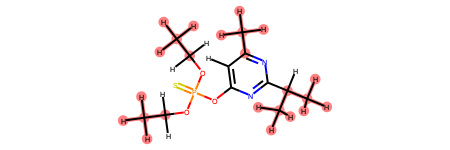

In [11]:
molecule = Molecule(smiles='CCOP(=S)(OCC)Oc1cc(nc(n1)C(C)C)C')
display(molecule)

### Parameterize with `Open Force Field Toolkit` and `ffld_server`, and generate the Impact template
To work with OPLS2005 non-bonding parameters, we need to call `Molecule.parameterize()` with two extra parameters, `use_OPLS_nonbonding_params` and `use_OPLS_bonds_and_angles`, both set to `True`. Then, the Impact template, named __diaz__, can be generated.

In [12]:
molecule.parameterize('openff_unconstrained-1.2.0.offxml',
                      use_OPLS_nonbonding_params=True,
                      use_OPLS_bonds_and_angles=True)
impact = Impact(molecule)
impact.write('diaz')

 - Loading forcefield
 - Computing partial charges with am1bcc
